### Data
- we took 800 cat and 800 dog images in train
    - train set : 1600 images
- 200 cats and 200 dog images in testset
    - test set : 400 images

In [ ]:
"""
data/
    train/
        dogs/
            dog001.jpg
            ...
        cats/
            cats001.jpg 
            ...
    validation/
        dogs/
            dog800.jpg
            ...
        cats/
            cat800.jpg
            ...

"""

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [4]:
# dimensions of our image
img_width, img_height = 150,150

train_data_dir="data/train"
validation_data_dir="data/validation"

nb_train_samples = 1600
nb_validation_samples = 400

epochs = 50
batch_size = 16

In [5]:
K.image_data_format()

'channels_last'

In [6]:
# get input shape based on image data format in keras
if K.image_data_format() == 'channels_first':
    input_shape = (3,img_width,img_height)
else:
    input_shape = (img_width,img_height,3)

### Creating the model
- this is our model 1
- here we are training a small convnet from scratch

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,activation='relu' ,kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,activation='relu' ,kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(loss=keras.losses.binary_crossentropy, 
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

- Our model is ready
- now we will look at Image Augmentation


In [11]:
# augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

test_datagen = ImageDataGenerator( rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width,img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary'
                                                   )

Found 1600 images belonging to 2 classes.


In [13]:
validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                    target_size=(img_width,img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary'
                                                   )

Found 400 images belonging to 2 classes.


In [15]:
# we will use fit generator method
# Trains the model on data generated batch-by-batch by a Python generator
history = model.fit_generator(train_generator, steps_per_epoch= nb_train_samples// batch_size,
                    epochs=5,
                    validation_data = validation_generator,
                    validation_steps = nb_validation_samples//batch_size
                   )

model.save_weights('scratch_model.h5')

Epoch 1/5
100/100 [==============================] - 69s 690ms/step - loss: 0.2152 - acc: 0.9038 - val_loss: 0.6926 - val_acc: 0.7625
Epoch 2/5
100/100 [==============================] - 71s 714ms/step - loss: 0.2191 - acc: 0.9087 - val_loss: 0.7199 - val_acc: 0.7675
Epoch 3/5
100/100 [==============================] - 73s 735ms/step - loss: 0.2246 - acc: 0.9094 - val_loss: 0.6673 - val_acc: 0.7775
Epoch 4/5
100/100 [==============================] - 71s 707ms/step - loss: 0.2150 - acc: 0.9087 - val_loss: 0.6755 - val_acc: 0.7625
Epoch 5/5
100/100 [==============================] - 65s 648ms/step - loss: 0.2085 - acc: 0.9031 - val_loss: 0.8000 - val_acc: 0.7525


In [16]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

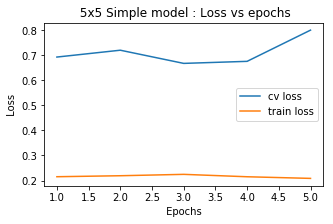

In [19]:
epochs_list = list(range(1,6))
import matplotlib.pyplot as plt
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs_list,cv_loss,label="cv loss")
plt.plot(epochs_list,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" 5x5 Simple model : Loss vs epochs")
plt.show()